# Task 05-Exploratory Data Analysis - Sports

In this task Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss     of a team.

● Suggest teams or players a company should endorse for its products.

### Author - Vaibhav Sontakke



***Importing Requires libraries***

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

***Loading Dataset***

In [103]:
match_data = pd.read_csv("matches.csv")
deliveries_data= pd.read_csv("deliveries.csv")


In [104]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [105]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [106]:
match_data.shape

(756, 18)

In [107]:
deliveries_data.shape


(179078, 21)

In [108]:
season_data=match_data[['id','season','winner']]

complete_data=deliveries_data.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [109]:
match_data['win_by']=np.where(match_data['win_by_runs']>0,'Bat first','Bowl first')

In [110]:
deliveries_data['runs']=deliveries_data['total_runs'].cumsum()

***Number of Matches played in each IPL season***

Text(0, 0.5, 'Matches')

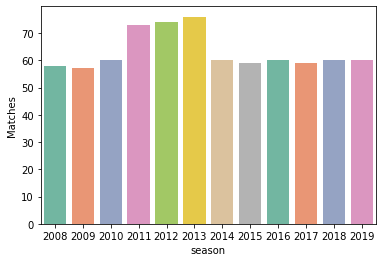

In [111]:
ax=sns.countplot('season',data=match_data,palette="Set2")
plt.ylabel('Matches')

***Matches Won By the Teams***

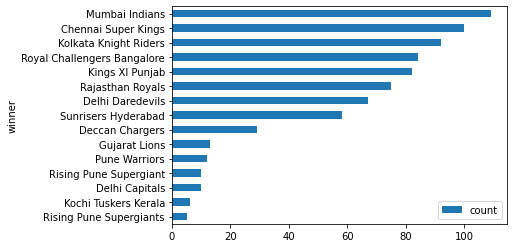

In [112]:
match_data.groupby('winner')['winner'].agg(['count']).sort_values('count').reset_index().plot(x='winner',y='count',kind='barh')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

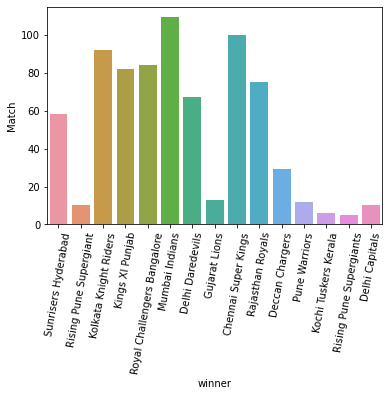

In [113]:
ax=sns.countplot(x='winner',data=match_data)
plt.ylabel('Match')
plt.xticks(rotation=80)

***Win Percentage***

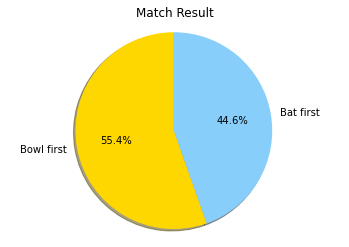

In [114]:
match=match_data.win_by.value_counts()
labels=np.array(match.index)
sizes = match.values
colors = ['gold', 'lightskyblue']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Match Result')
plt.axis('equal')
plt.show()

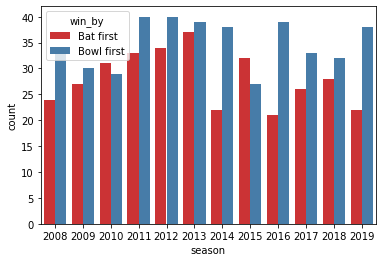

In [115]:
sns.countplot('season',hue='win_by',data=match_data,palette="Set1")

***Toss Decisions so far***

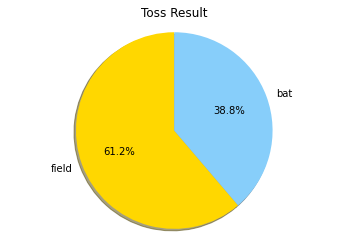

In [116]:
toss=match_data.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Result')
plt.axis('equal')
plt.show()

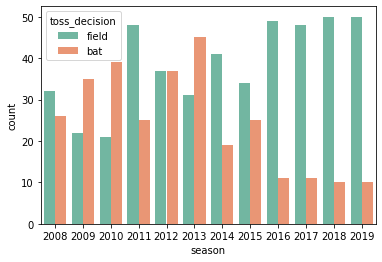

In [117]:
sns.countplot('season',hue='toss_decision',data=match_data,palette="Set2")

***IPL Winners***

In [118]:
final_matches=match_data.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


***Orange Cap Winners***

In [119]:
Season_orange_cap = complete_data.groupby(["season","batsman"])["batsman_runs"].sum().reset_index().sort_values(by="batsman_runs",ascending=False).reset_index(drop=True)
Season_orange_cap= Season_orange_cap.drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
Season_orange_cap

,season,batsman,batsman_runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


***Purple Cap Winners***

In [120]:
Season_purple_cap=complete_data[complete_data["dismissal_kind"]!="run out"]
Season_purple_cap=complete_data.groupby(["season","bowler"])["dismissal_kind"].count().reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True)
Season_purple_cap= Season_purple_cap.drop_duplicates(subset=["season"],keep="first").sort_values(by="season").reset_index(drop=True)
Season_purple_cap.columns= ["Season","Bowler","Wicket_taken"]
Season_purple_cap

,Season,Bowler,Wicket_taken
0,2008,Sohail Tanvir,24
1,2009,RP Singh,26
2,2010,PP Ojha,22
3,2011,SL Malinga,30
4,2012,M Morkel,30
5,2013,DJ Bravo,34
6,2014,MM Sharma,26
7,2015,DJ Bravo,28
8,2016,B Kumar,24
9,2017,B Kumar,28


***IPL Finals***

In [121]:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [122]:
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

***Win Percentage in Finals***

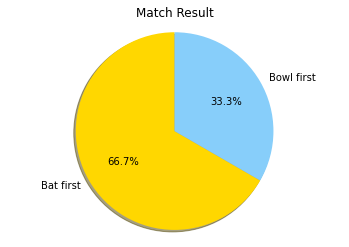

In [123]:
match=final_matches.win_by.value_counts()
labels=np.array(match.index)
sizes = match.values
colors = ['gold', 'lightskyblue']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Match Result')
plt.axis('equal')
plt.show()

***Toss Decision in Finals***

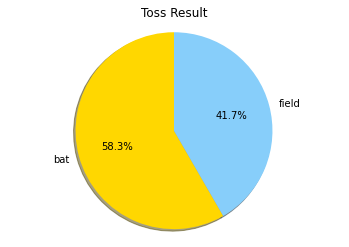

In [124]:
toss=final_matches.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['gold', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Result')
plt.axis('equal')
plt.show()

In [125]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


***Man of the Match in final match***

In [126]:
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


***It is interesting that out of 10 IPL finals,7 times the team that won the toss was also the winner of IPL***

In [127]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

***IPL leading Run Scorer***

In [128]:
batsman_score=deliveries_data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [129]:
No_Matches_player_dismissed = deliveries_data[["match_id","player_dismissed"]]
No_Matches_player_dismissed =No_Matches_player_dismissed .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player_dismissed.columns=["batsman","No_of Matches"]
No_Matches_player_dismissed .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


***Batting Average***

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

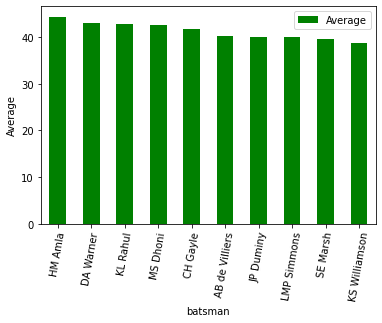

In [130]:
Batsman_Average=pd.merge(batsman_score,No_Matches_player_dismissed ,on="batsman")
#merging the score and match played by batsman
Batsman_Average=Batsman_Average[Batsman_Average["batsman_runs"]>=500]
# taking Average for those player for having more than 500 runs under thier belt
Batsman_Average["Average"]=Batsman_Average["batsman_runs"]/Batsman_Average["No_of Matches"]
Batsman_Average['Average']=Batsman_Average['Average'].apply(lambda x: round(x,2))
Batsman_Average=Batsman_Average.sort_values(by="Average",ascending=False).reset_index(drop=True)

top_bat_avg=Batsman_Average.iloc[:10,:]
ax=top_bat_avg.plot('batsman','Average',color='green',kind='bar')
plt.ylabel('Average')
plt.xticks(rotation=80)



 ***Dismissals in IPL***

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

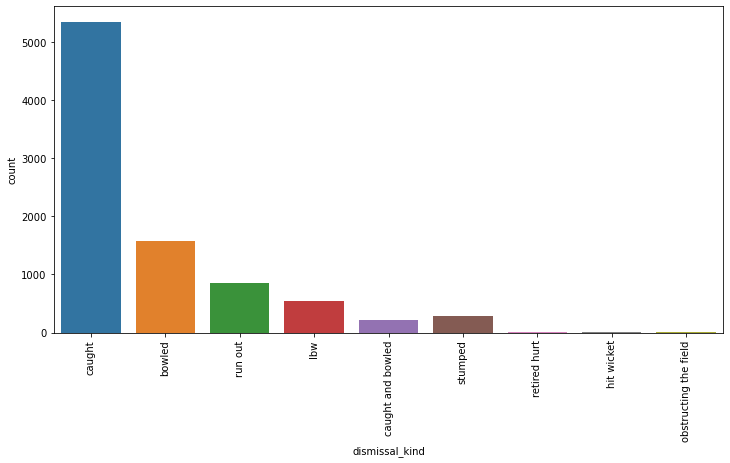

In [131]:
plt.figure(figsize=(12,6))
ax=sns.countplot(deliveries_data.dismissal_kind)
plt.xticks(rotation=90)


***Dismissal by Teams and their distribution***

In [132]:
out=deliveries_data.groupby(['batting_team','dismissal_kind'])['dismissal_kind'].agg(['count'])

out.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),2)).reset_index().sort_values(['batting_team','count'],ascending=[1,0]).set_index(['batting_team','dismissal_kind'])

count
batting_team        dismissal_kind          
Chennai Super Kings caught             62.32
                    bowled             15.38
                    run out             9.86
                    lbw                 5.87
                    stumped             3.64
...                                      ...
Sunrisers Hyderabad lbw                 4.66
                    stumped             2.83
                    caught and bowled   2.00
                    hit wicket          0.50
                    retired hurt        0.17

[102 rows x 1 columns]

In [133]:
wicket_data=deliveries_data.dropna(subset=['dismissal_kind'])

In [134]:
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

***IPL Most Wicket-Taking Bowlers***

In [135]:
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


***Powerplays***

In [136]:
powerplay_data=complete_data[complete_data['over']<=6]

##### Runs in Powerplays

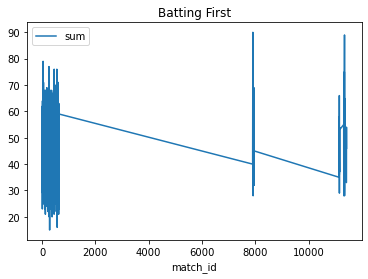

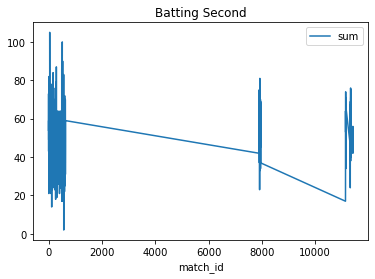

In [137]:
powerplay_data[ powerplay_data['inning']==1].groupby('match_id')['total_runs'].agg(['sum']).reset_index().plot(x='match_id',y='sum',title='Batting First')
powerplay_data[ powerplay_data['inning']==2].groupby('match_id')['total_runs'].agg(['sum']).reset_index().plot(x='match_id',y='sum',title='Batting Second')

##### Higgest Runs in PowerPlays

In [138]:
powerplay_data.groupby(['season','match_id','inning'])['total_runs'].agg(['sum']).reset_index().groupby('season')['sum'].max()

season
2008     78
2009     84
2010     76
2011     87
2012     68
2013     76
2014    100
2015     90
2016     72
2017    105
2018     90
2019     89
Name: sum, dtype: int64

##### Highest Runs in Powerplay :Batting First

In [139]:
pi1=powerplay_data[ powerplay_data['inning']==1].groupby(['season','match_id'])['total_runs'].agg(['sum'])
pi1.reset_index().groupby('season')['sum'].max()

season
2008    68
2009    68
2010    69
2011    77
2012    68
2013    76
2014    70
2015    76
2016    71
2017    79
2018    90
2019    89
Name: sum, dtype: int64

##### Highest Runs in Powerplay :Batting Second

In [140]:
pi2=powerplay_data[ powerplay_data['inning']==2].groupby(['season','match_id'])['total_runs'].agg(['sum'])

pi2.reset_index().groupby('season')['sum'].max()

season
2008     78
2009     84
2010     76
2011     87
2012     64
2013     64
2014    100
2015     90
2016     72
2017    105
2018     81
2019     76
Name: sum, dtype: int64

##### Maximum Wickets Fall in PowerPlay

In [141]:
powerplay_data.dropna(subset=['dismissal_kind']).groupby(['season','match_id','inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].max()

season
2008    4
2009    4
2010    4
2011    6
2012    4
2013    5
2014    5
2015    5
2016    5
2017    5
2018    4
2019    7
Name: count, dtype: int64

##### First Innings


In [142]:
powerplay_data[ powerplay_data['inning']==1].dropna(subset=['dismissal_kind']).groupby(['season','match_id','inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].max()

season
2008    4
2009    4
2010    4
2011    5
2012    4
2013    5
2014    5
2015    4
2016    4
2017    5
2018    4
2019    7
Name: count, dtype: int64

##### Second Innings

In [143]:
powerplay_data[ powerplay_data['inning']==2].dropna(subset=['dismissal_kind']).groupby(['season','match_id','inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].max()

season
2008    4
2009    4
2010    4
2011    6
2012    4
2013    4
2014    4
2015    5
2016    5
2017    5
2018    4
2019    4
Name: count, dtype: int64